# Практическая работа №3: Статистический анализ социальных сетей
Выполнил студент гр. 0381 Прохоров Борис. Вариант №16

## Цель работы
Овладеть навыками работы с математическими пакетами для статистического анализа социальных сетей.

## Основные теоретические положения
Диада $-$ элемент сети, представляющий собой пару акторов и связь между ними, либо её отсутствие,
        
$D_{ij}=(X_{ij}, X_{ji}), i\neq j$.
        
Цензус диад — тройка чисел <M, A, N>, где:
        
$M = \sum_{i<j} X_{ij} X_{ji}$
        
$A = X_{++} - 2M$

$N = (^2_g) - A - M$

Индекс взаимности Каца-Пауэлла — хар-ка измерения тенденции акторов в группе:

$-\infty < \rho_{кр} \leqslant 1$.

Индекс взаимности основан на ожидании кол-ва взаимн. диад, предполагая, что выбор делается акторами случайным образом.

Вероятность взаимного выбора между любой произвольной парой акторов равна

 $d^2/(g-1)^2$

Вероятность того, что общая диада является взаимной:

$p(i → j ∩ j → i) = \frac{d}{(g-1)}(\frac{d}{(g-1)} + p_{kp}\frac{g-1-d}{g-1})$

Оценка при свободном выборе 

$p_{ekp}$ = $\frac{2(g-1)M - gd^2}{gd(g-1-d)}$

Оценка при фиксированном выборе 

$p_{ekp}^\prime = \frac{2(g-1)^2M-L^2+L_2}{L(g-1)^2 -L^2 +L_2}$

Индекс взаимности Бандиопадхьяйя — индекс, основанный на максимальной и минимальной значениях количества диад в сети. 

$\rho_B = \displaystyle{\frac{M - M_{\min}}{M_{\max} - M_{\min}}}.$

$M_{\min} = \max f(t)$, $0\leqslant t \leqslant g$

$M_{\max} = \lfloor\frac{1}{2}(\sum_{i=1}^gx_{i+}-\max_{0 \leqslant t \leqslant g}g(t))\rfloor$
, где 

$f(t)=\sum_{i=1}^tx_{i+}-t(g-1)-(^t_2)$

$g(t)=\sum_{i=1}^tx_{i+}-t(t-1)-\sum_{i=t+1}^g\min(t,x_{i+})$

Нулевые гипотезы
 Для равномерного распределения

$H_0: L \sim B(g(g-1), \frac{1}{2})$

Статистика

$z_l = \frac{l - g(g-1)/2}{\sqrt{g(g-1)/4}}$ 

Для распределени Бернулли

$H_0 : L \sim B(g(g-1), P_0)$

Статистика

$z_l = \frac{l - g(g-1)P_0}{\sqrt{g(g-1)P_0(1-P_0)}}$

Доверительный интервал

Оценка $P$

$P_{est} = \frac{\sum_{i=1}^g\sum_{j=1}^gx_{ij}}{g(g-1)}=\frac{l}{g(g-1)}$

Доверительный интервал:

$P_{lower} \leqslant P \leqslant P_{upper}$

$P_{lower} = P_{est} - Z_{\frac{α}{2}}\sqrt{P_{est}(1-P_{est})/g(g-1)} $

$P_{upper} = P_{est} + Z_{\frac{α}{2}}\sqrt{P_{est}(1-P_{est})/g(g-1)} $

Где $Z_{\frac{\alpha}{2}}: Ф(Z_{\frac{\alpha}{2}} = 0.5 - \frac{\alpha}{2})$

## Постановка задачи
С помощью математических пакетов и соответствующих библиотек провести анализ заданных социальных сетей, вычислить описательные характеристики. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы
Установка и подключение библиотеки igraph.

In [1]:
install.packages("igraph")
library(igraph)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




In [2]:
# Константы
g <- 99
p <- 0.73
P_0 <- 0.62
alpha <- 0.04

1. С помощью библиотеки igraph смоделировать случайный орграф $\mathcal{G}_d$ на основе модели Эрдеша—Реньи: $\mathcal{G}_d  = \mathcal{G}(g, p)$, где $g$ – количество акторов, $p$ – вероятность появления дуги между акторами. В R для модели случайного графа Эрдеша—Реньи существует функция erdos.renyi.game(). Ознакомьтесь с данной моделью и опишите её.

In [5]:
G <- erdos.renyi.game(g, p, directed=TRUE, loops=FALSE)

Описание модели:
Модель Эрдёша — Реньи — это модель генерации случайных графов, в которой граф строится путем добавления очередного ребра с вероятностью p. Все ребра добавляются независимо друг от друга. В данной модели все графы с n узлами и M ребрами имеют одинаковую вероятность P. $$P = p^{M}(1-p)^{\left(\begin{array}{c}1\\ 2\end{array}\right)}$$

2. Отобразить полученный орграф.

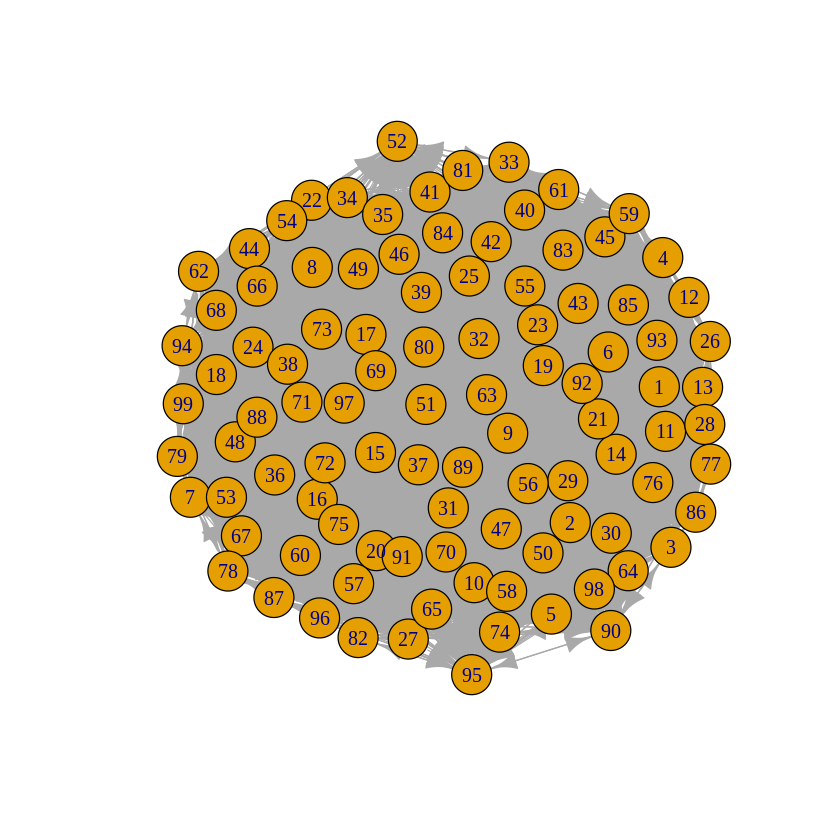

In [6]:
plot(G, layout=layout.fruchterman.reingold)

3. Вычислить «пятичисловую сводку» для графа $\mathcal{G}_d$.

In [7]:
cat("size: ", gorder(G), "\n")
cat("density: ", edge_density(G, loops=FALSE), "\n")
cat("components: ", count_components(G, mode="strong"), "\n")
cat("diameter: ", diameter(G), "\n")
cat("transitivity: ", transitivity(G), "\n")

size:  99 
density:  0.7272727 
components:  1 
diameter:  2 
transitivity:  0.9264626 


4. Вычислить цензус диад. Сделать выводы.

In [8]:
dCensus <- dyad.census(G)
dCensus

$mut
[1] 2562

$asym
[1] 1932

$null
[1] 357

Судя по цензусу диад, взаимных диад большинство (M = 2562), меньше всего нулевых диад (N = 357). 

5. Вычислить оценку индекса взаимности Каца—Пауэла при фиксированом выборе акторов 𝑑 и при свободном выборе. Сделать выводы.

In [18]:
d <- 70 # fix d
M <- dCensus$mut
X <- as.matrix(as_adjacency_matrix(G))
L <- sum(rowSums(X))
L2 <- sum(rowSums(X)^2)

fixed <- (2*(g-1) * M - g * d^2)/(g * d * (g-1-d))
free <- (2*(g - 1)^2 * M - L^2 + L2)/(L*(g - 1)^2 - L^2 + L2)

cat("Fixed choice: ", fixed, "\n")
cat("Free choice: ", free, "\n")

Fixed choice:  0.08787879 
Free choice:  -0.003875173 


Вывод: индекс показывает склонность к взаимным связям в сети (-inf, 1].
Судя по индексу, при свободном выборе склонность мала. При фиксированном эта склонность больше. 

6. Вычислить вероятность того, что связь будет взаимной для каждого случая.

In [19]:
P_fixed <- d/(g - 1) * (d/(g - 1) + fixed * (g - 1 - d)/(g - 1))
P_free <- d/(g - 1) * (d/(g - 1) + free * (g - 1 - d)/(g - 1))
cat("P_fixed: ", P_fixed, "\n")
cat("P_free: ", P_free, "\n")

P_fixed:  0.5281385 
P_free:  0.5094132 


7. Вычислить индекс взаимности Бандиопадхьяйя. Сделать выводы.

In [20]:
reciprocity(G)

[1] 0.7261905

Судя по индексу, взаимные диады (взаимные связи) встречаются в графе довольно часто. Индекс почти равен данному p.

8. Проверить нулевую гипотезу о том, что число дуг $L $ в орграфе $\mathcal{G}_d$ имеет биномиальное распределение 𝐿 ∼ Bin(g(g − 1), 1/2) при уровне значимости 𝛼. Определить максимальный уровень значимости при котором нулевая гипотеза не отвергается.

In [21]:
l <- sum(X)
binom.test(l, g*(g-1), conf.level = 0.96)


	Exact binomial test

data:  l and g * (g - 1)
number of successes = 7056, number of trials = 9702, p-value < 2.2e-16
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.7182919 0.7361170
sample estimates:
probability of success 
             0.7272727 


Вывод: Гипотеза отвергается (p-value << 𝛼). Максимальный уровень значимости при котором нулевая гипотеза не отвергается должен быть меньше 2.2e-16.

9. Проверить нулевую гипотезу о том, что число дуг $L $ в орграфе $\mathcal{G}_d$ имеет биномиальное распределение 𝐿 ∼ Bin(g(g − 1), $P_0$) при уровне значимости 𝛼. Определить максимальный уровень значимости при котором нулевая гипотеза не отвергается.

In [25]:
# P_0 = 0.62

binom.test(l, g*(g-1), P_0, conf.level = 0.96)


	Exact binomial test

data:  l and g * (g - 1)
number of successes = 7056, number of trials = 9702, p-value < 2.2e-16
alternative hypothesis: true probability of success is not equal to 0.62
96 percent confidence interval:
 0.7178621 0.7365350
sample estimates:
probability of success 
             0.7272727 


Вывод: Гипотеза отвергается. Максимальный уровень значимости при котором нулевая гипотеза не отвергается должен быть меньше 2.2e-16.

10. Построить доверительный интервал для оценки параметра 𝑝 с доверительной надёжностью (1 − 𝛼). Сделать выводы.

In [23]:
P_estimate <- l/(g*(g-1))
cat("Оценка параметра P: ", P_estimate, "\n")
z <- 2.053748909 # квантиль alpha/2
p_lower <- P_estimate - z * sqrt(P_estimate * (1 - P_estimate)/(g*(g-1)))
p_upper <- P_estimate + z * sqrt(P_estimate * (1 - P_estimate)/(g*(g-1)))

cat("confidence interval: [", p_lower, ", ", p_upper, "]\n")

Оценка параметра P 0.7272727 
confidence interval: [ 0.7179867 ,  0.7365587 ]


Вывод: построен доверительный интервал, покрывающий истинное значение p, с уровнем доверия 0.97.

## Выводы

В ходе выполнения практической работы были получены навыки работы с математическими пакетами для статистического анализа социальных сетей. Сгенирирован случайный граф и проведён его анализ. Были вычислены оценки индексов взаимности Каца—Пауэла и Бандиопадхьяйя, которые примерно совпали с заданным значение вероятности появления ребра в графе p. Проверены нулевые гипотезы о биноминальном распределении числа дуг в графе -- обе гипотезы были отвергнуты.